In [1]:
%%latex
\begin{align}
X^{cq}[k_{cq} ] = \sum_{n=0}^{N[k_eq]-1} w[n,k_{cq}]x[n]e^{-j\Omega_{k_{cq}^n}}
\end{align}

<IPython.core.display.Latex object>

In [2]:
import librosa, librosa.display
import numpy as np

In [3]:
import matplotlib.pyplot as plt
X = []
Y = []
for i in range(10):
    filename = "../../heli_and_boat.tar/heli" + str(i) + "_short.wav"
    y, sr = librosa.load(filename)
    C = librosa.cqt(y, sr=sr)
    X.append(np.ravel(C))
    Y.append(filename.split("/")[-1])
    print("1 read")
    filename = "../../heli_and_boat.tar/boat" + str(i) + "_short.wav"
    y, sr = librosa.load(filename)
    C = librosa.cqt(y, sr=sr)
    X.append(np.ravel(C))
    Y.append(filename.split("/")[-1])
    print("1 read")

1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read
1 read


In [4]:
X_new = []
for x in X:
    #zeros = [0]*(4021668-len(x))
    #X_new.append(np.concatenate((x,zeros)))
    X_new.append(x)
Y_new = np.array(Y)  

In [5]:
Y_new

array(['heli0_short.wav', 'boat0_short.wav', 'heli1_short.wav',
       'boat1_short.wav', 'heli2_short.wav', 'boat2_short.wav',
       'heli3_short.wav', 'boat3_short.wav', 'heli4_short.wav',
       'boat4_short.wav', 'heli5_short.wav', 'boat5_short.wav',
       'heli6_short.wav', 'boat6_short.wav', 'heli7_short.wav',
       'boat7_short.wav', 'heli8_short.wav', 'boat8_short.wav',
       'heli9_short.wav', 'boat9_short.wav'], 
      dtype='|S15')

In [6]:
np.savetxt("../../heli_and_boat.tar/X_short_Cont_Qs.train",X_new,delimiter=",")
np.savetxt("../../heli_and_boat.tar/Y_short_Cont_Qs.train",Y_new,delimiter=",",fmt="%s")

Automatically created module for IPython interactive environment
t-SNE: 0.14 sec


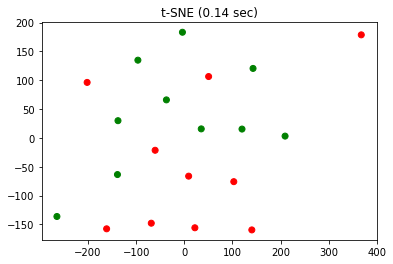

In [13]:
print(__doc__)

from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Next line to silence pyflakes.
Axes3D
fig = plt.figure()
ax = fig
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(X_new).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

plt.scatter(trans_data[0], trans_data[1], color = [ "r" if i%2==0 else "g" for i in range(trans_data.shape[1])], cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')
plt.show()